<a href="https://colab.research.google.com/github/sangbum-parkpark/project-4/blob/main/hard_head_detection_with_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
    #    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prepare Data for YOLOv5 Format

**Create directories to hold images and txt files for annotations (train , val ,test)**

In [3]:
# !mkdir -p Dataset/labels
# !mkdir -p Dataset/images

**classes**

In [4]:
classes = ['helmet','head','person']

**calculate ancor points and hiegt width of bonding boxes**

In [5]:
def convert_annot(size , box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]


In [6]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/' +  img_jpg_file_name + '.txt'
    print(save_file_name)
    #file_path = open(save_file_name, "a+")
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:

            cls_num = classes.index(box[0])

            new_box = convert_annot(size, box[1:])

            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [7]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    #print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
   
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
  

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_txt_file(img_xml_file, [img_w, img_h], img_box)

In [8]:
!ls /content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels

 hard_hat_workers0.txt	    hard_hat_workers3258.txt
 hard_hat_workers1000.txt   hard_hat_workers3259.txt
 hard_hat_workers1001.txt   hard_hat_workers325.txt
 hard_hat_workers1002.txt   hard_hat_workers3260.txt
 hard_hat_workers1003.txt   hard_hat_workers3261.txt
 hard_hat_workers1004.txt   hard_hat_workers3262.txt
 hard_hat_workers1005.txt   hard_hat_workers3263.txt
 hard_hat_workers1006.txt   hard_hat_workers3264.txt
 hard_hat_workers1007.txt   hard_hat_workers3265.txt
 hard_hat_workers1008.txt   hard_hat_workers3266.txt
 hard_hat_workers1009.txt   hard_hat_workers3267.txt
 hard_hat_workers100.txt    hard_hat_workers3268.txt
 hard_hat_workers1010.txt   hard_hat_workers3269.txt
 hard_hat_workers1011.txt   hard_hat_workers326.txt
 hard_hat_workers1012.txt   hard_hat_workers3270.txt
 hard_hat_workers1013.txt   hard_hat_workers3271.txt
 hard_hat_workers1014.txt   hard_hat_workers3272.txt
 hard_hat_workers1015.txt   hard_hat_workers3273.txt
 hard_hat_workers1016.txt   hard_hat_workers3274.

In [9]:
files = os.listdir('/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/annotations')
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    print(file_xml[0])
    get_xml_data('/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/annotations', file_xml[0])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
hard_hat_workers4280
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers4280.txt
file name:  hard_hat_workers2454.xml
hard_hat_workers2454
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers2454.txt
file name:  hard_hat_workers2999.xml
hard_hat_workers2999
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers2999.txt
file name:  hard_hat_workers2431.xml
hard_hat_workers2431
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers2431.txt
file name:  hard_hat_workers3154.xml
hard_hat_workers3154
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers3154.txt
file name:  hard_hat_workers4964.xml
hard_hat_workers4964
/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/hard_hat_workers4964.txt
file name:  hard_hat_workers3550.xml
hard_hat_workers3550
/content/drive/MyDrive/AI부트캠프/kaggle/working/Datas

# split train val test

In [10]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)
print('total :',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total : 5000
train : 4000
val   : 500
test  : 500


In [11]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path( '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    root_file = Path('/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.png', '')        
        img_src_file = imgs_source + '/' + img_name + '.png'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        #print(img_sor_file)
        #print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [ ]:
copy_data(train_list, '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels', '/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/images', "train")
copy_data(val_list,   '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels', '/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/images', "val")
copy_data(test_list,  '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/labels', '/content/drive/MyDrive/AI부트캠프/kaggle/input/hard-hat-detection/images', "test")

In [13]:
!ls /content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images

test  train  val


# Get YOLOv5 model

In [14]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [15]:
!ls 

CONTRIBUTING.md  Dockerfile  LICENSE	  README.md	    train.py
data		 export.py   models	  requirements.txt  tutorial.ipynb
detect.py	 hubconf.py  __pycache__  test.py	    utils


**create yaml file for configuration**

In [16]:
import yaml

dict_file = {'train':'/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/train' ,
            'val': '/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/val',
            'nc' : '3',
            'names' : ['helmet','head','person']}

with open('/content/drive/MyDrive/AI부트캠프/kaggle/working/yolov5/data/hard_head.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

# Train Net

In [17]:
!wandb disabled

/bin/bash: wandb: command not found


In [19]:
!python train.py --img 416 --batch 32 --epochs 30 --data /content/drive/MyDrive/AI부트캠프/kaggle/working/yolov5/data/hard_head.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/drive/MyDrive/AI부트캠프/kaggle/working/yolov5/data/hard_head.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=32, img_size=[416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-253-g57c5d02 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

# Detect (predict)

In [20]:
#!python detect.py --source /kaggle/working/Dataset/images/test --img-size 416 --conf 0.4 --weights weights.pt 
!python detect.py --source /content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/test  --weights yolov5s.pt --conf 0.25

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/AI부트캠프/kaggle/working/Dataset/images/test, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-253-g57c5d02 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/500

In [21]:
# display detected images
from IPython.display import Image

<function matplotlib.pyplot.show>

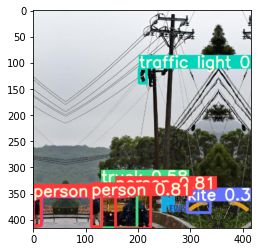

In [24]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp/*')

img = plt.imread(testfiles[20]) 
plt.imshow(img)    
plt.show